<a href="https://colab.research.google.com/github/fidanfatih/NLP_Projects/blob/main/E_Commerce_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***) and **Deep Learning algorithms**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning and Deep Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries, Load and Discover the Data

In [ ]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import gc

In [ ]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Womens Clothing E-Commerce Reviews.csv",index_col='Unnamed: 0')
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.shape

(23486, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

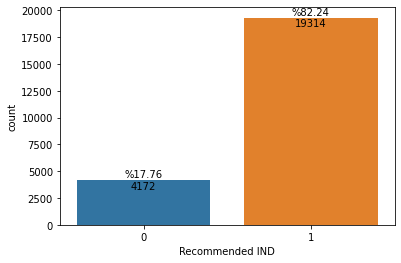

In [ ]:
def labels(ax, df, xytext=(0, 0)):
    for bar in ax.patches: 
        ax.annotate('%{:.2f}\n{:.0f}'.format(100*bar.get_height()/len(df),bar.get_height()), 
                    (bar.get_x() + bar.get_width() / 2,  bar.get_height()), ha='center', va='center')

ax = sns.countplot(data =df, x = "Recommended IND");
labels(ax, df)
# inbalanced data. So we have to focus F1_scores

### Data Wrangling

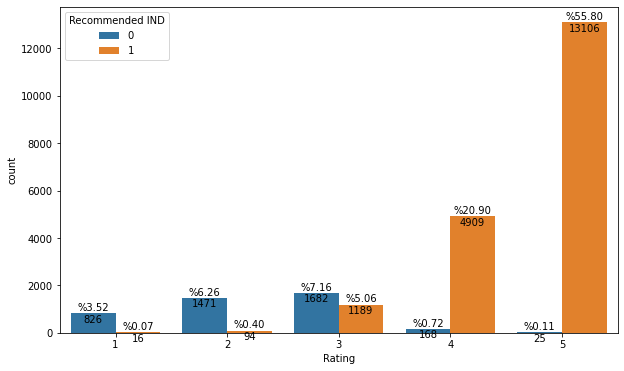

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
labels(ax, df)

* Those who recommend with a rating of 1 and 2 and those with a rating of 4 and 5 and do not recommend can be considered as outliers.
* Those with a rating of 3 are undecided and the distribution is balanced. In order for the model to make more accurate predictions, we should drop the Recommed=True comments of the people who gave Rating 3.
* Since it is more valuable for us to catch negative comments, we dropped positive comments and left negative comments in rating 3.

In [ ]:
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]

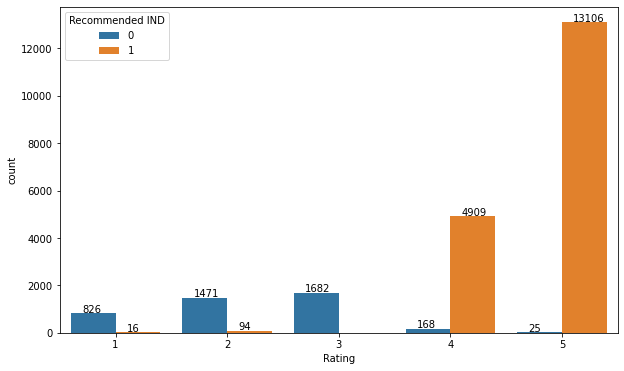

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
        
# labels(ax, df)

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [ ]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
new_col_names={'Clothing ID':'clothing_id', 
               'Age':'age', 'Title':'title', 
               'Review Text':'review', 
               'Rating':'rating',
               'Recommended IND':'label', 
               'Positive Feedback Count':'feedback', 
               'Division Name':'division',
               'Department Name':'department', 
               'Class Name':'class'}
df.rename(new_col_names,axis=1,inplace=True)
df.head(5)

,clothing_id,age,title,review,rating,label,feedback,division,department,class
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


---
---


### Drop Dublication

In [ ]:
df.duplicated().sum()

21

In [ ]:
df.drop_duplicates(inplace=True)

### Missing Value Detection

In [ ]:
def null_values(df):
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)

null_values(df)

,Missing_Records,Percentage (%)
title,3620,16.250673
review,806,3.618244
division,14,0.062848
department,14,0.062848
class,14,0.062848


* Empty rows and Nan values will be dropped after Title and Review Text are combined in the same column.

In [ ]:
df.title = df.title.str.strip().fillna('')
df.review = df.review.str.strip().fillna('')

In [ ]:
df['text'] = df[['title', 'review']].agg(' '.join, axis=1)

# Alternative
# df['text']=df.title + ' ' + df.review

In [ ]:
df=df[['text','label']]
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and com...,1
1,Love this dress! it's sooo pretty. i happen...,1
2,Some major design flaws I had such high hopes ...,0
3,"My favorite buy! I love, love, love this jumps...",1
4,Flattering shirt This shirt is very flattering...,1


In [ ]:
null_values(df)

,Missing_Records,Percentage (%)


In [ ]:
df.reset_index(drop=True, inplace=True)

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
    
    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [ ]:
df2 = df.copy()

In [ ]:
df2["text"] = df2["text"].apply(cleaning)
df2["text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    major design flaw high hope dress really wante...
3    favorite buy love love love jumpsuit fun flirt...
4    flattering shirt shirt flattering due adjustab...
Name: text, dtype: object

### Rare Words

In [ ]:
rare_words = pd.Series(" ".join(df2["text"]).split()).value_counts()
rare_words

dress        12290
love         10507
fit          10234
size          9011
top           8927
             ...  
whiplash         1
recipe           1
absence          1
allelujah        1
platinum         1
Length: 12190, dtype: int64

In [ ]:
rare_words = rare_words[rare_words <= 2]
rare_words

akward         2
completel      2
amaze          2
compfy         2
overlapping    2
              ..
whiplash       1
recipe         1
absence        1
allelujah      1
platinum       1
Length: 6660, dtype: int64

In [ ]:
rare_words.index

Index(['akward', 'completel', 'amaze', 'compfy', 'overlapping', 'nit', 'nah',
       'fantasy', 'excels', 'abnormally',
       ...
       'shininess', 'neighboring', 'appr', 'regulr', 'plucked', 'whiplash',
       'recipe', 'absence', 'allelujah', 'platinum'],
      dtype='object', length=6660)

In [ ]:
# Cleaning rare words from the corpus
df2["text"] = df2["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df2["text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    major design flaw high hope dress really wante...
3    favorite buy love love love jumpsuit fun flirt...
4    flattering shirt shirt flattering due adjustab...
Name: text, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [ ]:
positive_sentences = df[df["label"] == 1]["text"]
positive_sentences

0         Absolutely wonderful - silky and sexy and com...
1         Love this dress!  it's sooo pretty.  i happen...
3        My favorite buy! I love, love, love this jumps...
4        Flattering shirt This shirt is very flattering...
6        Cagrcoal shimmer fun I aded this in my basket ...
                               ...                        
22269    Cheeky! These bottoms are very cute but defian...
22270    Entrancing I'm so impressed with the beautiful...
22272    What a fun piece! So i wasn't sure about order...
22273    Great dress for many occasions I was very happ...
22275    Please make more like this one! This dress in ...
Name: text, Length: 18104, dtype: object

In [ ]:
negative_sentences = df[df["label"] == 0]["text"]
negative_sentences

2        Some major design flaws I had such high hopes ...
5        Not for the very petite I love tracy reese dre...
10       Dress looks like it's made of cheap material D...
20       Not what it looks like First of all, this is n...
22       Falls flat Loved the material, but i didnt rea...
                               ...                        
22245    Not for me I tried these on because the color ...
22246     I wanted to love this jacket. so soft and gre...
22255    Such high hopes! I purchased this for a very g...
22271    Unflattering I was surprised at the positive r...
22274    Cute, but see through This fit well, but the t...
Name: text, Length: 4172, dtype: object

### Collect Words (positive and negative separately)

In [ ]:
positive_words = " ".join(positive_sentences)
negative_words = " ".join(negative_sentences)

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

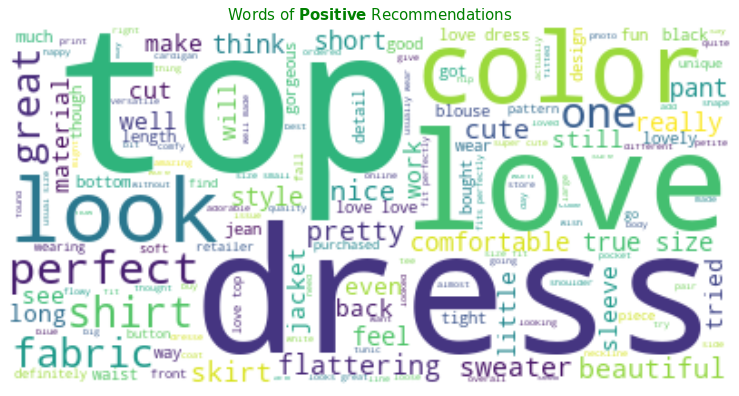

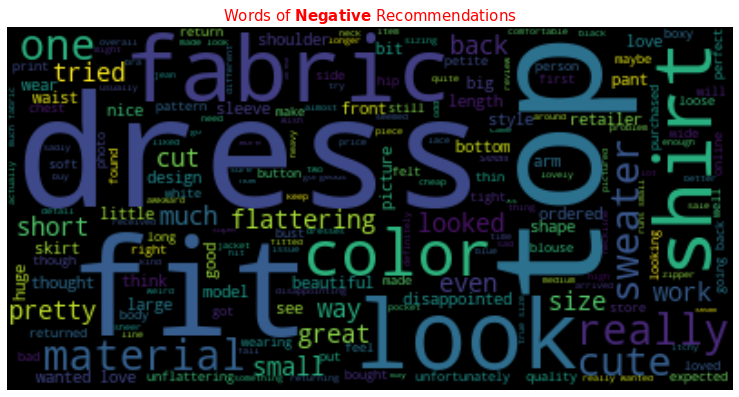

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off"),
plt.title('Words of '+r"$\bf{Positive}$"+' Recommendations', size=15, color='green')
plt.show()

wordcloud = WordCloud(background_color="black").generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Words of '+r"$\bf{Negative}$"+' Recommendations', size=15, color='red')
plt.show()

## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model.

### Eval functions

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [ ]:
from sklearn.model_selection import train_test_split
X = df2["text"]
y= df2["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

,aa,ab,abby,abdomen,ability,able,abo,abroad,absolute,absolutely,absolutley,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,accessory,accident,accidental,accidentally,accommodate,accommodates,accommodating,accomodate,according,accordingly,account,accurate,...,xxsmall,xxsp,yarn,yay,yeah,year,yellow,yellowish,yellowy,yep,yes,yesterday,yesteryear,yet,yikes,yo,yoga,yogi,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17817,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17818,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_count.shape, X_test_count.shape, 

((17820, 5501), (4456, 5501))

### TF-IDF

* TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
* IDF(t) = log_e(Total number of documents / Number of documents with term t in it).
* kelimenin document ta cok gecmesi, corpus ta az gecmesi TF*IDF degerini artirir.
* Ayrintili bilgi: https://www.bugraayan.com/2019/04/21/tf-idf-sade-anlatim/

In [ ]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,aa,ab,abby,abdomen,ability,able,abo,abroad,absolute,absolutely,absolutley,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,accessory,accident,accidental,accidentally,accommodate,accommodates,accommodating,accomodate,according,accordingly,account,accurate,...,xxsmall,xxsp,yarn,yay,yeah,year,yellow,yellowish,yellowy,yep,yes,yesterday,yesteryear,yet,yikes,yo,yoga,yogi,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.156844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
metrics = pd.DataFrame(columns=["Logistic Count", "Logistic Tf", "Naive Bayes Count", "Naive Bayes Tf", "SVM Count", "SVM Tf", "DL"],
                       index=['accuracy','precision-0','recall-0','f1-0','precision-1','recall-1','f1-1'])


### Logistic Regression

#### CountVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
logmodel_count = LogisticRegression(C = 10)
logmodel_count.fit(X_train_count, y_train)

LogisticRegression(C=10)

In [ ]:
y_pred = logmodel_count.predict(X_test_count)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 582  253]
 [ 201 3420]]
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       835
           1       0.93      0.94      0.94      3621

    accuracy                           0.90      4456
   macro avg       0.84      0.82      0.83      4456
weighted avg       0.90      0.90      0.90      4456



In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(logmodel_count, X_train_count, y_train, cv = 10, scoring = j).mean()
    print(f" {i} score for count : {scores}\n")
    metrics.loc[i,"Logistic Count"]=scores

 accuracy score for count : 0.8983726150392819

 precision-0 score for count : 0.7456507851612753

 recall-0 score for count : 0.6946278613943285

 f1-0 score for count : 0.7191185587863262

 precision-1 score for count : 0.930733191163557

 recall-1 score for count : 0.9453149724138192

 f1-1 score for count : 0.9379606129565106



#### TF-IDF

In [ ]:
logmodel_tf_idf = LogisticRegression(C = 10)
logmodel_tf_idf.fit(X_train_tf_idf, y_train)

LogisticRegression(C=10)

In [ ]:
y_pred = logmodel_tf_idf.predict(X_test_tf_idf)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 593  242]
 [ 127 3494]]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       835
           1       0.94      0.96      0.95      3621

    accuracy                           0.92      4456
   macro avg       0.88      0.84      0.86      4456
weighted avg       0.91      0.92      0.91      4456



In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(logmodel_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    print(f" {i} score for tf_idf : {scores}\n")
    metrics.loc[i,"Logistic Tf"]=scores

 accuracy score for tf_idf : 0.9142536475869809

 precision-0 score for tf_idf : 0.8177890343929144

 recall-0 score for tf_idf : 0.6979365593138048

 f1-0 score for tf_idf : 0.7529866185361452

 precision-1 score for tf_idf : 0.9326786507001277

 recall-1 score for tf_idf : 0.9640954516164701

 f1-1 score for tf_idf : 0.9481204881284861



### Naive Bayes 

#### CountVectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
naive_count = BernoulliNB()
naive_count.fit(X_train_count, y_train)

BernoulliNB()

In [ ]:
y_pred = naive_count.predict(X_test_count)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 644  191]
 [ 268 3353]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       835
           1       0.95      0.93      0.94      3621

    accuracy                           0.90      4456
   macro avg       0.83      0.85      0.84      4456
weighted avg       0.90      0.90      0.90      4456



In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(naive_count, X_train_count, y_train, cv = 10, scoring = j).mean()
    print(f" {i} score for count : {scores}\n")
    metrics.loc[i,"Naive Bayes Count"]=scores

 accuracy score for count : 0.9001122334455667

 precision-0 score for count : 0.7126694078222783

 recall-0 score for count : 0.7818255381129633

 f1-0 score for count : 0.745543198086237

 precision-1 score for count : 0.9486077975929591

 recall-1 score for count : 0.9273630795099688

 f1-1 score for count : 0.9378561559424332



#### TF-IDF

In [ ]:
naive_tf_idf = BernoulliNB()
naive_tf_idf.fit(X_train_tf_idf, y_train)

BernoulliNB()

In [ ]:
y_pred = naive_tf_idf.predict(X_test_tf_idf)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 644  191]
 [ 268 3353]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       835
           1       0.95      0.93      0.94      3621

    accuracy                           0.90      4456
   macro avg       0.83      0.85      0.84      4456
weighted avg       0.90      0.90      0.90      4456



In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(naive_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    print(f" {i} score for tf_idf : {scores}\n")
    metrics.loc[i,"Naive Bayes Tf"]=scores


 accuracy score for tf_idf : 0.9001122334455667

 precision-0 score for tf_idf : 0.7126694078222783

 recall-0 score for tf_idf : 0.7818255381129633

 f1-0 score for tf_idf : 0.745543198086237

 precision-1 score for tf_idf : 0.9486077975929591

 recall-1 score for tf_idf : 0.9273630795099688

 f1-1 score for tf_idf : 0.9378561559424332



### Support Vector Machine (SVM)

#### CountVectorizer

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svm_count = LinearSVC(C=10).fit(X_train_count, y_train)
y_pred = svm_count.predict(X_test_count)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 569  266]
 [ 312 3309]]
              precision    recall  f1-score   support

           0       0.65      0.68      0.66       835
           1       0.93      0.91      0.92      3621

    accuracy                           0.87      4456
   macro avg       0.79      0.80      0.79      4456
weighted avg       0.87      0.87      0.87      4456



In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(svm_count, X_train_count, y_train, cv = 10, scoring = j).mean()
    print(f" {i} score for count : {scores}\n")
    metrics.loc[i,"SVM Count"]=scores


 accuracy score for count : 0.8732884399551066

 precision-0 score for count : 0.6637330517163845

 recall-0 score for count : 0.6640673607739476

 f1-0 score for count : 0.6621187421317424

 precision-1 score for count : 0.9224811358144033

 recall-1 score for count : 0.9214255687862462

 f1-1 score for count : 0.9218520934802557



#### TD-IDF

In [ ]:
svm_tf_idf = LinearSVC(C=10).fit(X_train_tf_idf, y_train)
y_pred = svm_tf_idf.predict(X_test_tf_idf)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 577  258]
 [ 230 3391]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       835
           1       0.93      0.94      0.93      3621

    accuracy                           0.89      4456
   macro avg       0.82      0.81      0.82      4456
weighted avg       0.89      0.89      0.89      4456



In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

for i, j in custom_scorer.items():
    scores = cross_val_score(svm_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    print(f" {i} score for tf_idf : {scores}\n")
    metrics.loc[i,"SVM Tf"]=scores

 accuracy score for tf_idf : 0.8950617283950619

 precision-0 score for tf_idf : 0.7333609649175103

 recall-0 score for tf_idf : 0.6916284548021074

 f1-0 score for tf_idf : 0.7116715393999313

 precision-1 score for tf_idf : 0.9298785173525763

 recall-1 score for tf_idf : 0.9419317094281064

 f1-1 score for tf_idf : 0.935853342602613



### Random Forest

#### CountVectorizer

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rf_count = RandomForestClassifier(300, n_jobs = -1, min_samples_split =3, random_state = 42).fit(X_train_count, y_train)
# y_pred = rf_count.predict(X_test_count)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [ ]:
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# custom_scorer = {'accuracy': make_scorer(accuracy_score),
#                  'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
#                  'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
#                  'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
#                  'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
#                  'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
#                  'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
#                  }

# for i, j in custom_scorer.items():
#     scores = cross_val_score(rf_count, X_train_count, y_train, cv = 10, scoring = j).mean()
#     print(f" {i} score for count : {scores}\n")

#### TF-IDF

In [ ]:
# rf_tf_idf = RandomForestClassifier(300, n_jobs = -1, min_samples_split =3, random_state = 42).fit(X_train_tf_idf, y_train)
# y_pred = rf_tf_idf.predict(X_test_tf_idf)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [ ]:
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# custom_scorer = {'accuracy': make_scorer(accuracy_score),
#                  'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
#                  'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
#                  'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
#                  'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
#                  'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
#                  'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
#                  }

# for i, j in custom_scorer.items():
#     scores = cross_val_score(rf_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
#     print(f" {i} score for tf_idf : {scores}\n")

### Ada Boosting

#### CountVectorizer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# ada_count = AdaBoostClassifier(n_estimators= 100, random_state = 42).fit(X_train_count, y_train)
# y_pred = ada_count.predict(X_test_count)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [ ]:
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# custom_scorer = {'accuracy': make_scorer(accuracy_score),
#                  'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
#                  'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
#                  'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
#                  'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
#                  'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
#                  'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
#                  }

# for i, j in custom_scorer.items():
#     scores = cross_val_score(ada_count, X_train_count, y_train, cv = 10, scoring = j).mean()
#     print(f" {i} score for count : {scores}\n")

#### TF-IDF

In [ ]:
# ada_tf_idf = AdaBoostClassifier(n_estimators= 100, random_state = 42).fit(X_train_tf_idf, y_train)
# y_pred = ada_tf_idf.predict(X_test_tf_idf)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [ ]:
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# custom_scorer = {'accuracy': make_scorer(accuracy_score),
#                  'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
#                  'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
#                  'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
#                  'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
#                  'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
#                  'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
#                  }

# for i, j in custom_scorer.items():
#     scores = cross_val_score(ada_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
#     print(f" {i} score for tf_idf : {scores}\n")

In [ ]:
gc.collect()

1734

### XGBoost

#### CountVectorizer

In [ ]:
# from xgboost import XGBClassifier

In [ ]:
# xgb_count = XGBClassifier(learning_rate= 0.1, max_depth= 7, n_estimators= 600, subsample= 0.8,  random_state = 42, class_weight="balanced").fit(X_train_count, y_train)
# y_pred = xgb_count.predict(X_test_count)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [ ]:
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# custom_scorer = {'accuracy': make_scorer(accuracy_score),
#                  'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
#                  'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
#                  'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
#                  'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
#                  'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
#                  'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
#                  }

# for i, j in custom_scorer.items():
#     scores = cross_val_score(xgb_count, X_train_count, y_train, cv = 10, scoring = j).mean()
#     print(f" {i} score for count : {scores}\n")

#### TF-IDF

In [ ]:
# xgb_tf_idf = XGBClassifier(learning_rate= 0.1, max_depth= 7, n_estimators= 600, subsample= 0.8,  random_state = 42, class_weight="balanced").fit(X_train_tf_idf, y_train)
# y_pred = xgb_tf_idf.predict(X_test_tf_idf)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [ ]:
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# custom_scorer = {'accuracy': make_scorer(accuracy_score),
#                  'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
#                  'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
#                  'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
#                  'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
#                  'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
#                  'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
#                  }

# for i, j in custom_scorer.items():
#     scores = cross_val_score(xgb_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
#     print(f" {i} score for tf_idf : {scores}\n")

In [ ]:
gc.collect()

300

### LightGBM

#### CountVectorizer

In [ ]:
# from lightgbm import LGBMClassifier

In [ ]:
# lgb_count = LGBMClassifier(random_state = 42)
# lgb_count.fit(X_train_count, y_train)
# y_pred = lgb_count.predict(X_test_count)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [ ]:
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# custom_scorer = {'accuracy': make_scorer(accuracy_score),
#                  'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
#                  'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
#                  'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
#                  'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
#                  'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
#                  'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
#                  }

# for i, j in custom_scorer.items():
#     scores = cross_val_score(lgb_count, X_train_count, y_train, cv = 10, scoring = j).mean()
#     print(f" {i} score for count : {scores}\n")

#### TF-IDF

In [ ]:
# lgb_tf_idf = LGBMClassifier(random_state = 42)
# lgb_tf_idf.fit(X_train_tf_idf, y_train)
# y_pred = lgb_tf_idf.predict(X_test_tf_idf)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [ ]:
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# custom_scorer = {'accuracy': make_scorer(accuracy_score),
#                  'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
#                  'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
#                  'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
#                  'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
#                  'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
#                  'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
#                  }

# for i, j in custom_scorer.items():
#     scores = cross_val_score(lgb_tf_idf, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
#     print(f" {i} score for tf_idf : {scores}\n")

In [ ]:
metrics

,Logistic Count,Logistic Tf,Naive Bayes Count,Naive Bayes Tf,SVM Count,SVM Tf,DL
accuracy,0.898373,0.914254,0.900112,0.900112,0.873288,0.895062,NaN
precision-0,0.745651,0.817789,0.712669,0.712669,0.663733,0.733361,NaN
recall-0,0.694628,0.697937,0.781826,0.781826,0.664067,0.691628,NaN
f1-0,0.719119,0.752987,0.745543,0.745543,0.662119,0.711672,NaN
precision-1,0.930733,0.932679,0.948608,0.948608,0.922481,0.929879,NaN
recall-1,0.945315,0.964095,0.927363,0.927363,0.921426,0.941932,NaN
f1-1,0.937961,0.94812,0.937856,0.937856,0.921852,0.935853,NaN


### DL modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, balanced_accuracy_score

In [ ]:
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and com...,1
1,Love this dress! it's sooo pretty. i happen...,1
2,Some major design flaws I had such high hopes ...,0
3,"My favorite buy! I love, love, love this jumps...",1
4,Flattering shirt This shirt is very flattering...,1


#### Tokenization

In [ ]:
X = df['text'].values
y = df['label'].values

In [ ]:
num_words = 10000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır.
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' 

In [ ]:
tokenizer.fit_on_texts(X)

#### Creating word index

In [ ]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'dress': 16,
 'was': 17,
 'my': 18,
 'love': 19,
 'not': 20,
 'that': 21,
 'size': 22,
 'very': 23,
 'top': 24,
 'great': 25,
 'have': 26,
 'fit': 27,
 'are': 28,
 'like': 29,
 'be': 30,
 'as': 31,
 'me': 32,
 'wear': 33,
 "it's": 34,
 'too': 35,
 'or': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'up': 41,
 'they': 42,
 'fabric': 43,
 'small': 44,
 'would': 45,
 'color': 46,
 'at': 47,
 'perfect': 48,
 'cute': 49,
 'beautiful': 50,
 'flattering': 51,
 'look': 52,
 'more': 53,
 'really': 54,
 'little': 55,
 'if': 56,
 'soft': 57,
 'these': 58,
 'ordered': 59,
 'one': 60,
 'will': 61,
 'comfortable': 62,
 'nice': 63,
 'well': 64,
 'out': 65,
 'an': 66,
 'back': 67,
 'can': 68,
 'had': 69,
 'shirt': 70,
 'because': 71,
 'bought': 72,
 'than': 73,
 'all': 74,
 '\r': 75,
 'large': 76,
 'sweater': 77,
 'looks': 78,
 'fits'

In [ ]:
len(tokenizer.word_index)

15012

#### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

#### Fixing token counts of all documents (pad_sequences)

In [ ]:
# max_tokens icin corpusun %95 ini icerecek bir deger secelim.
max_tokens = 106
sum(num_tokens < max_tokens) / len(num_tokens)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [ ]:
X_pad.shape

(22276, 106)

#### Train Set Split

In [ ]:
from sklearn.model_selection import train_test_split
from keras.layers import Bidirectional

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=42)

#### Modeling

In [ ]:
model = Sequential()
embedding_size = 100
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [ ]:
model.add(Bidirectional(GRU(units=48, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units=48, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units=48)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(lr=0.004)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [ ]:
model.summary() 
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (48*48 + 48*48  +2*48)*3 ==> m =  48, n = 48
# (48*48 + 48*48  +2*48)*3 ==> m =  48, n = 48

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 106, 100)         1000000   
                                                                 
 bidirectional (Bidirectiona  (None, 106, 96)          43200     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 106, 96)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 106, 96)          42048     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 106, 96)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 96)               4

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 3, restore_best_weights=True)

In [ ]:
pd.Series(y_train).value_counts(normalize=True)

1    0.8127
0    0.1873
dtype: float64

In [ ]:
weights = {0:19, 1:81}

In [ ]:
model.fit(X_train, y_train, epochs=25, batch_size=128, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
157/157 [==============================] - 120s 685ms/step - loss: 10.6395 - recall: 0.9902 - val_loss: 0.2777 - val_recall: 0.9901
Epoch 2/25
157/157 [==============================] - 106s 673ms/step - loss: 5.5470 - recall: 0.9891 - val_loss: 0.2370 - val_recall: 0.9807
Epoch 3/25
157/157 [==============================] - 105s 670ms/step - loss: 4.0925 - recall: 0.9912 - val_loss: 0.2383 - val_recall: 0.9702
Epoch 4/25
157/157 [==============================] - 105s 668ms/step - loss: 2.8516 - recall: 0.9943 - val_loss: 0.3770 - val_recall: 0.9823
Epoch 5/25
157/157 [==============================] - 104s 662ms/step - loss: 2.2495 - recall: 0.9963 - val_loss: 0.3215 - val_recall: 0.9746
Epoch 00005: early stopping


#### Model evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,10.639467,0.990241,0.277711,0.990061
1,5.547000,0.989075,0.237009,0.980674
2,4.092458,0.991162,0.238312,0.970182
3,2.851611,0.994292,0.376969,0.982330
4,2.249488,0.996256,0.321462,0.974600


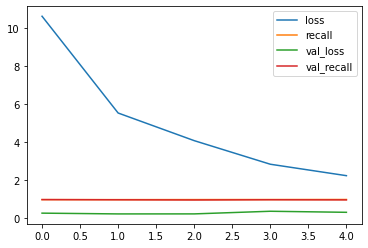

In [ ]:
model_loss.plot()

In [ ]:
model.evaluate(X_train, y_train)

627/627 [==============================] - 40s 64ms/step - loss: 0.1221 - recall: 0.9936


[0.12207125872373581, 0.99355548620224]

In [ ]:
model.evaluate(X_test, y_test)

70/70 [==============================] - 5s 65ms/step - loss: 0.2370 - recall: 0.9807


[0.2370089292526245, 0.9806736707687378]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[ 3015   740]
 [  105 16188]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      3755
           1       0.96      0.99      0.97     16293

    accuracy                           0.96     20048
   macro avg       0.96      0.90      0.93     20048
weighted avg       0.96      0.96      0.96     20048



In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[ 261  156]
 [  35 1776]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.63      0.73       417
           1       0.92      0.98      0.95      1811

    accuracy                           0.91      2228
   macro avg       0.90      0.80      0.84      2228
weighted avg       0.91      0.91      0.91      2228



In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

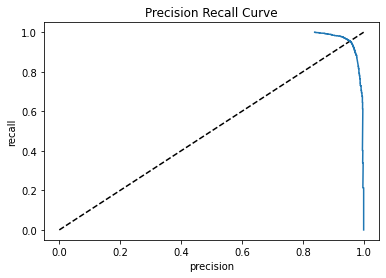

In [ ]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [ ]:
custom_scorer = {'accuracy': accuracy_score(y_test, y_pred),
                 'precision-0': precision_score(y_test, y_pred, pos_label=0),
                 'recall-0': recall_score(y_test, y_pred, pos_label=0),
                 'f1-0': f1_score(y_test, y_pred, pos_label=0),
                 'precision-1': precision_score(y_test, y_pred, pos_label=1),
                 'recall-1': recall_score(y_test, y_pred, pos_label=1),
                 'f1-1': f1_score(y_test, y_pred, pos_label=1)
                 }

for i, j in custom_scorer.items():
  metrics.loc[i,"DL"] = j

In [ ]:
metrics = metrics.astype('float64')
metrics = metrics.T.reset_index().rename(columns={'index':'models'})

## Compare Models F1 Scores, Recall Scores and Average Precision Score

In [ ]:
metrics.to_pickle('/content/drive/MyDrive/Colab Notebooks/NLP/metrics.pkl')
# metric = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/NLP/metrics.pkl')

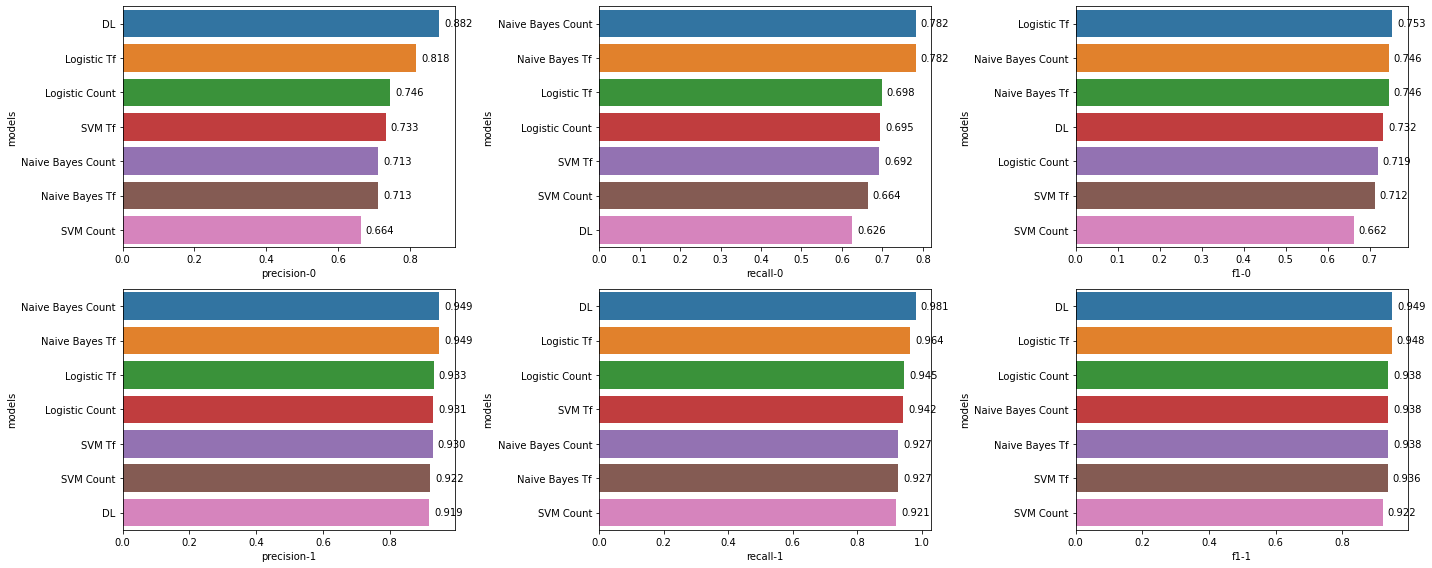

In [ ]:
def labels(ax):
  for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
    
fig, ax = plt.subplots(2,3, figsize=(20, 8))

sns.barplot(x=metrics.sort_values(by="precision-0", ascending=False)['precision-0'], y=metrics.sort_values(by="precision-0", ascending=False)['models'], ax=ax[0,0])
labels(ax[0,0])
sns.barplot(x=metrics.sort_values(by="recall-0", ascending=False)['recall-0'], y=metrics.sort_values(by="recall-0", ascending=False)['models'], ax=ax[0,1])
labels(ax[0,1])
sns.barplot(x=metrics.sort_values(by="f1-0", ascending=False)['f1-0'], y=metrics.sort_values(by="f1-0", ascending=False)['models'], ax=ax[0,2])
labels(ax[0,2])

sns.barplot(x=metrics.sort_values(by="precision-1", ascending=False)['precision-1'], y=metrics.sort_values(by="precision-1", ascending=False)['models'], ax=ax[1,0])
labels(ax[1,0])
sns.barplot(x=metrics.sort_values(by="recall-1", ascending=False)['recall-1'], y=metrics.sort_values(by="recall-1", ascending=False)['models'], ax=ax[1,1])
labels(ax[1,1])
sns.barplot(x=metrics.sort_values(by="f1-1", ascending=False)['f1-1'], y=metrics.sort_values(by="f1-1", ascending=False)['models'], ax=ax[1,2])
labels(ax[1,2])

plt.tight_layout()
plt.show()

In [ ]:
metrics

index,models,accuracy,precision-0,recall-0,f1-0,precision-1,recall-1,f1-1
0,Logistic Count,0.898373,0.745651,0.694628,0.719119,0.930733,0.945315,0.937961
1,Logistic Tf,0.914254,0.817789,0.697937,0.752987,0.932679,0.964095,0.948120
2,Naive Bayes Count,0.900112,0.712669,0.781826,0.745543,0.948608,0.927363,0.937856
3,Naive Bayes Tf,0.900112,0.712669,0.781826,0.745543,0.948608,0.927363,0.937856
4,SVM Count,0.873288,0.663733,0.664067,0.662119,0.922481,0.921426,0.921852
5,SVM Tf,0.895062,0.733361,0.691628,0.711672,0.929879,0.941932,0.935853
6,DL,0.914273,0.881757,0.625899,0.732118,0.919255,0.980674,0.948971


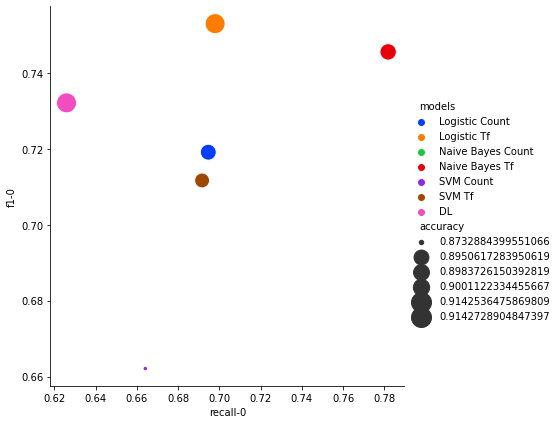

In [ ]:
sns.relplot(x="recall-0", y="f1-0", hue="models", size="accuracy", 
            sizes=(20, 400), alpha=1, palette="bright", height=6, aspect=1, legend='full', data=metrics);

## 6. Conclusion



* Naive Bayes Algoritmasi NLP de genellikle basarili sonuclar verir. Bu projede de en dengeli sonuclari Naive Bayes verdi. 
* Count Vectorization ve TF-IDF yontemlerinin her ikisinde Naive Bayes ile ayni skorlari verdi.
* 2.olarak en basarili algoritma Logistic Regression with Count Vectorization oldu.
* 3.olarak en basarili algoritma SVM with TF-IDF oldu.
* Diger algoritmalarda overfit oldu.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___